C:\Users\user\Documents\Sussex Projects\Deblending\arch-180130-120929\12-cutout-HSC-G-10055-pdr1_deep.fits


INFO: Auto-setting vmin to -7.173e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.714e+00 [aplpy.core]


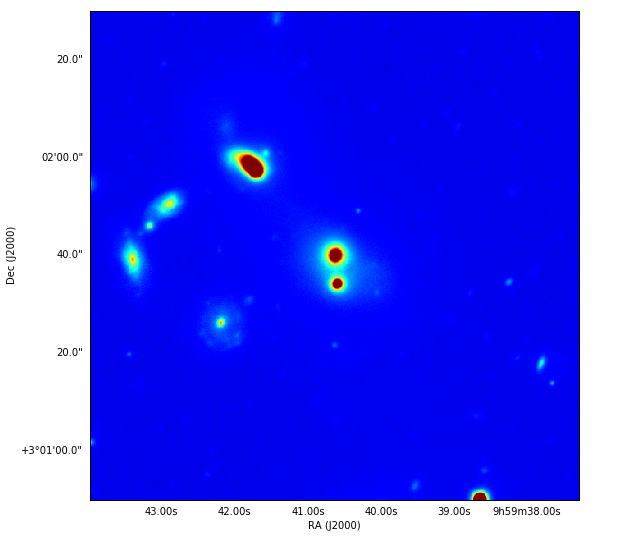

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import aplpy
import os

topdir = "C:\\Users\\user\\Documents\\Sussex Projects\\Deblending"
fil = "arch-180130-120929\\12-cutout-HSC-G-10055-pdr1_deep.fits"
#fil = "NGC 450\\frame-g-004858-1-0480.fits"
fildir = os.path.join(topdir,fil)

print(fildir)
gc = aplpy.FITSFigure(fildir)
#gc.show_grayscale(vmin = 0.25, stretch = 'log')
gc.show_colorscale()
#gc.show_colorscale(cmap='gist_heat')


In [21]:
from astropy.io import fits
import matplotlib.colors as colors
hdu_list = fits.open('arch-180130-120929/12-cutout-HSC-G-10055-pdr1_deep.fits',ignore_missing_end = True)
#hdu_list = fits.open('NGC 450/frame-g-004858-1-0480.fits')#,ignore_missing_end = True)
hdu_list.info()



Filename: arch-180130-120929/12-cutout-HSC-G-10055-pdr1_deep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   ()      
  1  IMAGE         1 ImageHDU        34   (596, 597)   float32   
  2  MASK          1 ImageHDU        50   (596, 597)   int16 (rescales to uint16)   
  3  VARIANCE      1 ImageHDU        34   (596, 597)   float32   


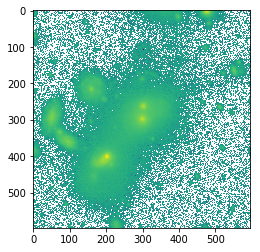

In [22]:
image_data = hdu_list[1].data
plt.imshow(image_data, norm = colors.LogNorm())
#plt.imshow(image_data)

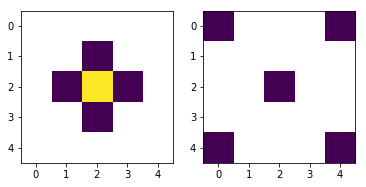

In [45]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion

def detect_peaks(image):
    neighbourhood = generate_binary_structure(2,2)
    #print(neighbourhood)
    #print(image)
    local_max = maximum_filter(image, footprint=neighbourhood)==image
    #background = (image == 0)
    #eroded_background = binary_erosion(background, structure = neighbourhood, border_value = 1)
    detected_peaks = local_max# ^ eroded_background
    return detected_peaks
trial = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,1,2,1,0],[0,0,1,0,0],[0,0,0,0,0]])    
detected_peaks = detect_peaks(trial)
plt.subplot(1,2,1)
plt.imshow(trial, norm = colors.LogNorm())
plt.subplot(1,2,2)
plt.imshow(detected_peaks, norm = colors.LogNorm())

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


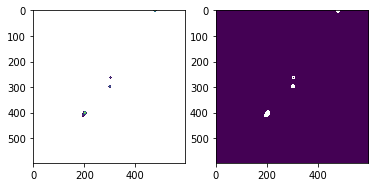

In [42]:
from scipy.ndimage import binary_dilation

def detect_peaks_larger(image):
    neighbourhood = np.ones((5,5))
#    a = np.zeros((5,5))
#    a[2,2] = 1
#    a
#
#    struct = generate_binary_structure(2,2)
#    struct
#    neighbourhood = binary_dilation(a,structure = struct, iterations = 2)#.astype(a.dtype)
    #print(neighbourhood)
    local_max = maximum_filter(image, footprint=neighbourhood)==image
    #print(np.sum(local_max))
    #background = (image == 0)
    #print(np.sum(background))
    #eroded_background = binary_erosion(background, structure = neighbourhood, border_value = 1)
    detected_peaks = local_max# ^ eroded_background
    return detected_peaks

detected_peaks = detect_peaks_larger(image_data.astype(int))
plt.subplot(1,2,1)
plt.imshow(image_data, norm = colors.LogNorm())
plt.subplot(1,2,2)
plt.imshow(detected_peaks, norm = colors.LogNorm())



Text(0.5,1,'Filter')

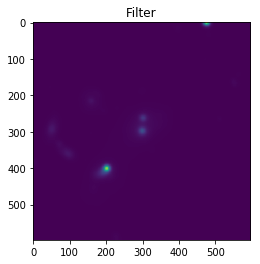

In [25]:
from scipy import signal, misc
#image = misc.ascent()
image = image_data
w = signal.gaussian(50,5.0).astype(np.float32)
image_new = signal.sepfir2d(image, w, w)
plt.figure()
plt.imshow(image_new)
plt.title('Filter')



In [26]:
avg=np.mean(image_data)
print(avg)
stdev =np.std(image_data)
print(stdev)
print(np.max(image_data))


0.155907
1.83115
188.658


In [48]:
mask = image < 5 * stdev
image[mask] = np.nan
print(image)

right = 0
down = 0
for i in range(0,595):
    for j in range(0,595):
        if image_data [i][j] < image_data [i][j+1]:
            right += 1
        if image_data [i][j] < image_data [i+1][j]:
            down += 1
        if image_data [i][j] > image_data [i][j+1] and image_data [i][j] > image_data [i+1][j]:
            print(i,j)
            
print(right)
print(down)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]
0 475
0 476
0 477
0 478
0 479
0 480
1 475
1 476
1 477
1 478
1 479
1 480
2 475
2 476
2 477
2 478
2 479
2 480
3 475
3 476
3 477
3 478
3 479
3 480
4 475
4 476
4 477
4 478
4 479
5 475
5 476
5 477
5 478
5 479
6 475
6 476
6 477
263 301
263 302
263 303
263 304
264 301
264 302
264 303
264 304
265 301
265 302
265 303
266 301
266 302
298 299
298 300
298 301
298 302
298 303
299 299
299 300
299 301
299 302
299 303
300 299
300 300
300 301
300 302
300 303
301 299
301 300
301 301
301 302
302 299
302 300
302 301
400 202
400 203
400 204
400 205
400 206
400 207
401 202
401 203
401 204
401 205
401 206
401 207
401 208
402 202
402 203
402 204
402 205
402 206
402 207
402 208
403 202
403 203
403 204
403 205
403 206
403 207
403 208
404 202
404 203
404 204
404 205
404 206
404 20

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[-2147483648 -2147483648 -2147483648 ..., -2147483648 -2147483648
  -2147483648]
 [-2147483648 -2147483648 -2147483648 ..., -2147483648 -2147483648
  -2147483648]
 [-2147483648 -2147483648 -2147483648 ..., -2147483648 -2147483648
  -2147483648]
 ..., 
 [-2147483648 -2147483648 -2147483648 ..., -2147483648 -2147483648
  -2147483648]
 [-2147483648 -2147483648 -2147483648 ..., -2147483648 -2147483648
  -2147483648]
 [-2147483648 -2147483648 -2147483648 ..., -2147483648 -2147483648
  -2147483648]]


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


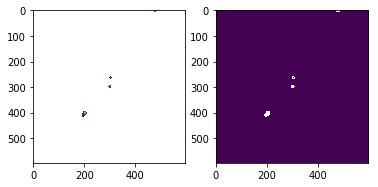

In [52]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion, binary_dilation

def detect_peaks(image):

    neighbourhood = generate_binary_structure(2,2)
    print(neighbourhood)
    print(image)
    local_max = maximum_filter(image, footprint=neighbourhood)==image
    background = (image == 0)
    eroded_background = binary_erosion(background, structure = neighbourhood, border_value = 1)
    detected_peaks = local_max ^ eroded_background
    return detected_peaks
    
detected_peaks = detect_peaks(image_data.astype(int))
plt.subplot(1,2,1)
plt.imshow(image_data, norm = colors.LogNorm())
plt.subplot(1,2,2)
plt.imshow(detected_peaks, norm = colors.LogNorm())